In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [3]:
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [4]:
police_killings['raceethnicity'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

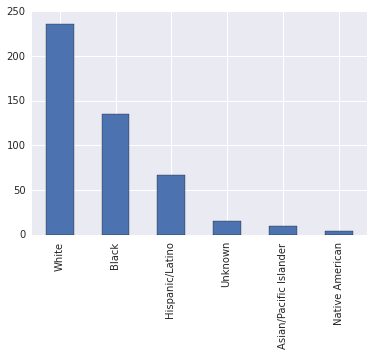

In [20]:
police_killings['raceethnicity'].value_counts().plot(kind='bar')
sns.plt.show()

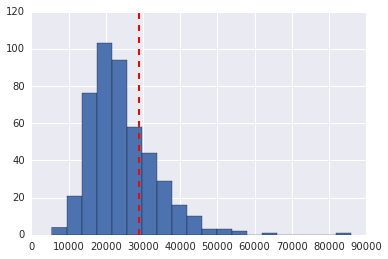

In [21]:
income = police_killings['p_income'][police_killings['p_income']!='-']
income = income.astype('int')
income.hist(bins=20)
plt.axvline(28851, color='r', linestyle='dashed', linewidth=2)
sns.plt.show()

In [7]:
state_pop = pd.read_csv("state_population.csv", encoding="ISO-8859-1")

In [8]:
counts = police_killings['state_fp'].value_counts() # Series - killings by state
states = pd.DataFrame({"STATE": counts.index, "shootings": counts}) #DataFrame

In [9]:
states = pd.merge(state_pop,states,on='STATE')

In [10]:
states['pop_millions'] = states['POPESTIMATE2015']/1000000
states['rate'] = states['shootings']/states['pop_millions']

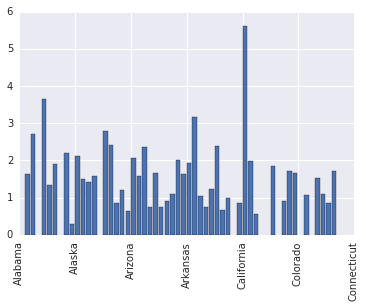

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(states["STATE"],states["rate"]) # Creates points on grid
ax.set_xticklabels(states["NAME"],rotation='vertical')
plt.show() 

In [23]:
sorted_states = states.sort_values(by=['rate'], ascending=False)
sorted_states[['NAME','rate']]

,NAME,rate
35,Oklahoma,5.624674
2,Arizona,3.661359
27,Nebraska,3.164240
11,Hawaii,2.794071
1,Alaska,2.708442
12,Idaho,2.417021
31,New Mexico,2.397956
18,Louisiana,2.355095
5,Colorado,2.199182
7,Delaware,2.114312


In [25]:
topten = sorted_states[:10]['STATE']
bottomten = sorted_states[-10:]['STATE']

In [26]:
pk_clean = police_killings[(police_killings['share_white'] != '-') & (police_killings['share_black'] != '-') & (police_killings['share_hispanic'] != '-')]
pk_clean[['share_white', 'share_black', 'share_hispanic']] = pk_clean[['share_white', 'share_black', 'share_hispanic']].astype(float)

/opt/dsserver/lib/python3.4/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [28]:
top_ten = pk_clean[pk_clean['state_fp'].isin(topten)]
bottom_ten = pk_clean[pk_clean['state_fp'].isin(bottomten)]
top_ten[['pop', 'county_income', 'share_white', 'share_black', 'share_hispanic']].mean()
bottom_ten[['pop', 'county_income', 'share_white', 'share_black', 'share_hispanic']].mean()

pop                4153.472727
county_income     55037.963636
share_white          60.132727
share_black          21.610909
share_hispanic       12.994545
dtype: float64